# DSAI 2201 Winter 2024 Assignment

In [1]:
NAME = "Peter Yeshua J. Sotomango"

COLLABORATORS = "NONE"

## Assignment 1 - Data Analysis
**(20 points in total)**

In Assignments part 1 & part 2 we will go through the entire journey of a small data science project.

More details about the dataset can be found in the Kaggle website in the following links: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

But a modified version of the dataset was attached in the dropbox, please use it to answer this assignment
     



**Question 1.**  _(2 points)_
* A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages.  _(0.5 points)_
* B) Compute descriptive statistics of the data. Comment on the results.  _(0.75 points)_
* C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.  _(0.75  points)_

**Question 2.**  _(2 points)_
* Use univariate plots  to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? . (2 points)


**Question 3.**  _(2 points)_ (Help)
* Use multivariate plots to:
   * A) Analyze the relationship between medical variables. Comment on the results  _(1 points)_
   * B) Identify potential factors that can predict Death event in married patients. Comment on the results.  _(1 points)_

**Question 4.**  _(3 points)_
* Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.  _(3 points)_

**Question 5.**  _(3 points)_
* How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments._(3 points)_

**Question 6.**  _(3 points)_
* The dataset contains  contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it._(3 points)_


**Question 7.**  _(2 points)_
* Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. _(2 points)_

**Question 8.**  _(3 points)_
* Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, _(1.5 points)_
* identify the most irrelevant attribute(s), and exclude them from your project for the next steps  _(1.5 points)_

## Q1:

Solution:



Number of deaths according to race stats: 
White: 510 | 82.792%
Other: 33 | 5.357%
Black: 73 | 11.851%
Total Dead: 616
      


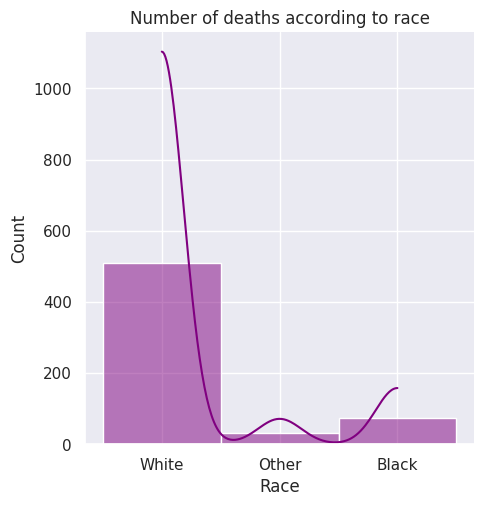

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv("Breast_Cancer-Winter2024.csv")
dead_patients = raw_data[raw_data["Status"] != "Alive"].copy()
white_dead = dead_patients[dead_patients["Race"] == "White"].Race.count()
black_dead = dead_patients[dead_patients["Race"] == "Black"].Race.count()
other_dead = dead_patients[dead_patients["Race"] == "Other"].Race.count()
total_dead = dead_patients.Race.count()

sns.set(style="darkgrid")
sns.displot(x="Race", data = dead_patients, kde=True, color="Purple")
plt.title("Number of deaths according to race")

print(f"""Number of deaths according to race stats: 
White: {white_dead} | {round(white_dead/total_dead, 5) * 100}%
Other: {other_dead} | {round(other_dead/total_dead, 5) * 100}%
Black: {black_dead} | {round(black_dead/total_dead, 5) * 100}%
Total Dead: {total_dead}
      """)

In [3]:
raw_data.describe()
# With over 4024 records, we can see that the average age that the patients that died were: ~54 years old, 
# with the tumor size being 30.42, where 14.36 nodes were removed and examined,
# where 4.16 is the positive rate of the node having cancer, and the average survival rate being 71.17 months.

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4018.000000,4024.000000,4024.000000,4017.000000
mean,53.972167,30.422101,14.357107,4.158052,71.173762
std,8.963134,21.154352,8.099675,5.109331,23.089655
min,30.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [4]:
med_variables = ["Age", "Tumor Size", "Regional Node Examined" ,"Reginol Node Positive", "Survival Months"]

print("Kurtosis of medical variables:")
for i in med_variables:
    print(f"  {i}: {raw_data[i].kurt()}")

print("")
    
print("Skewness of medical variables:")
for i in med_variables:
    print(f"  {i}: {raw_data[i].skew()}")

Kurtosis of medical variables:
  Age: -0.7550875306304676
  Tumor Size: 3.6228951934582416
  Regional Node Examined: 1.6493224651730367
  Reginol Node Positive: 8.981265882027166
  Survival Months: 0.07057080755735923

Skewness of medical variables:
  Age: -0.2203727859678868
  Tumor Size: 1.7360650155740946
  Regional Node Examined: 0.8292737694534275
  Reginol Node Positive: 2.702535859800024
  Survival Months: -0.6110980670933592


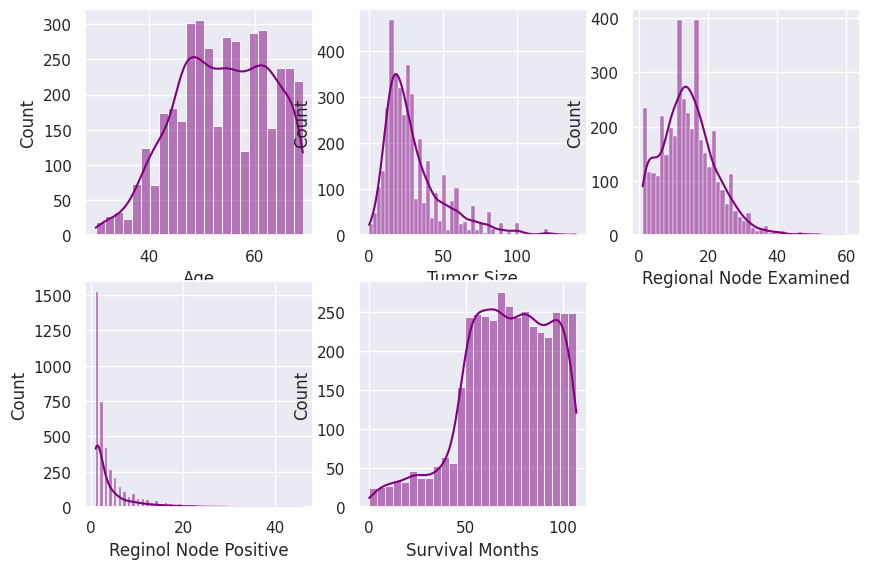

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))

for i in range(1, len(med_variables)+1):
    plt.subplot(3,3, i)
    sns.histplot(raw_data[med_variables[i-1]],kde="True", color="Purple")

Solution: We have three  positively skewed data points which means most of the values are higher than the mean, while 2 our negatively skewed which indicate that most of the values are lower than the mean. While kurtosis has 4 positive values meaning that tails of these data sets are heavier than normal distribution and one negative value which is lighter tails. 

###  Q2:
Solution: In terms of race, and considering the data is not yet cleaned and preprocessed, we can see that the distribution of deaths with regards to race are fairly equal. Where one race is more likely to die from another. In terms of Marital Status, though still close to one another it definitely tells a little bit more but varies according to the medical variable suggesting a link between each other.

Use univariate plots to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? . (2 points)

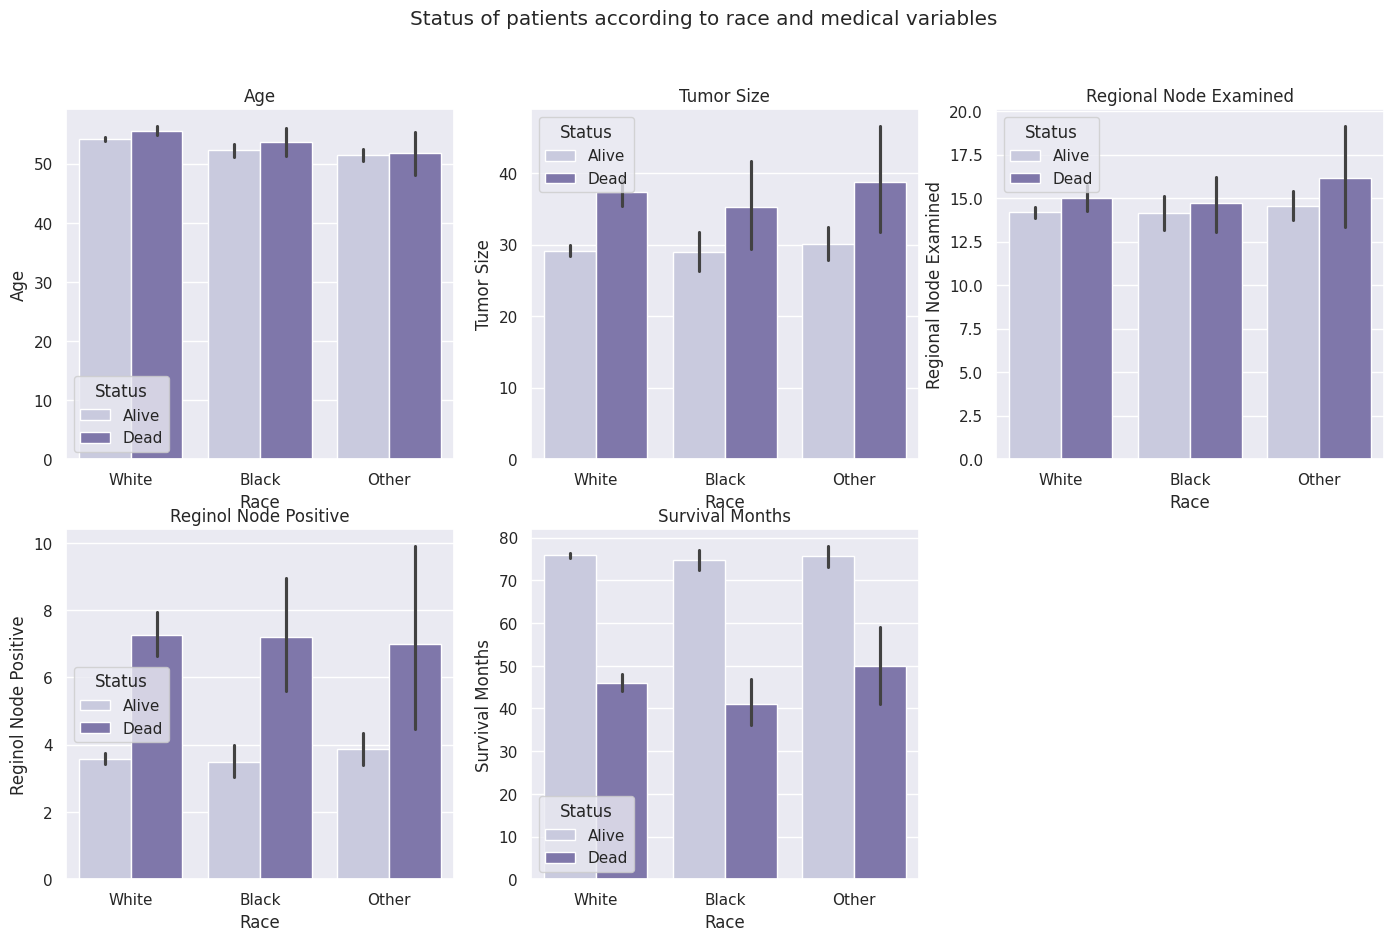

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(17, 10))
plt.suptitle("Status of patients according to race and medical variables")

for i in range(1, len(med_variables) + 1):
    plt.subplot(2,3, i)
    sns.barplot(y=med_variables[i-1], x="Race", hue="Status", data=raw_data, palette="Purples")
    plt.title(med_variables[i-1])

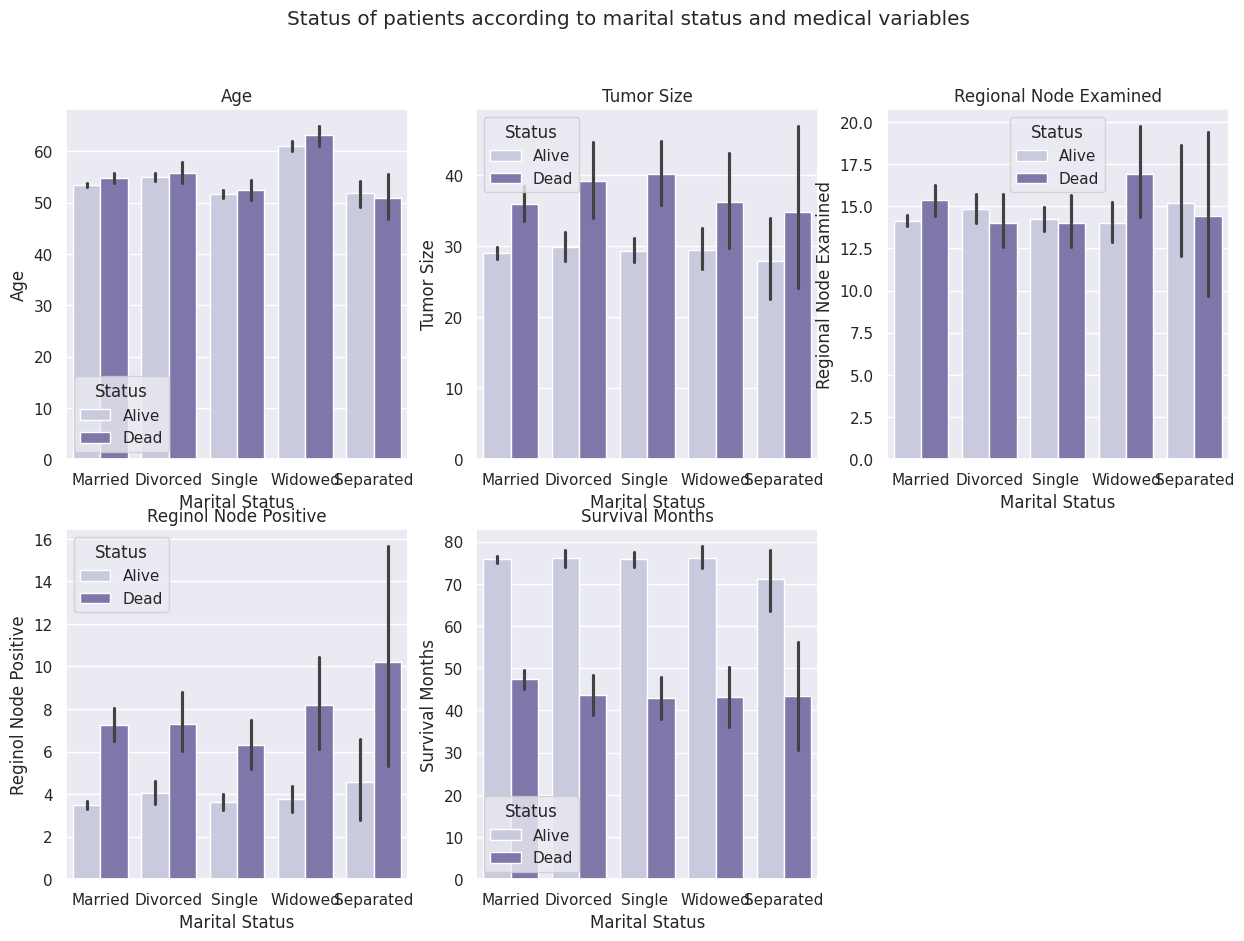

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
plt.suptitle("Status of patients according to marital status and medical variables")

for i in range(1, len(med_variables) + 1):
    plt.subplot(2,3, i)
    sns.barplot(y=med_variables[i-1], x="Marital Status", hue="Status", data=raw_data, palette="Purples")
    plt.title(med_variables[i-1])

###  Q3:

[Text(0.5, 1.0, 'Heatmap of the correlation between the medical variables.')]

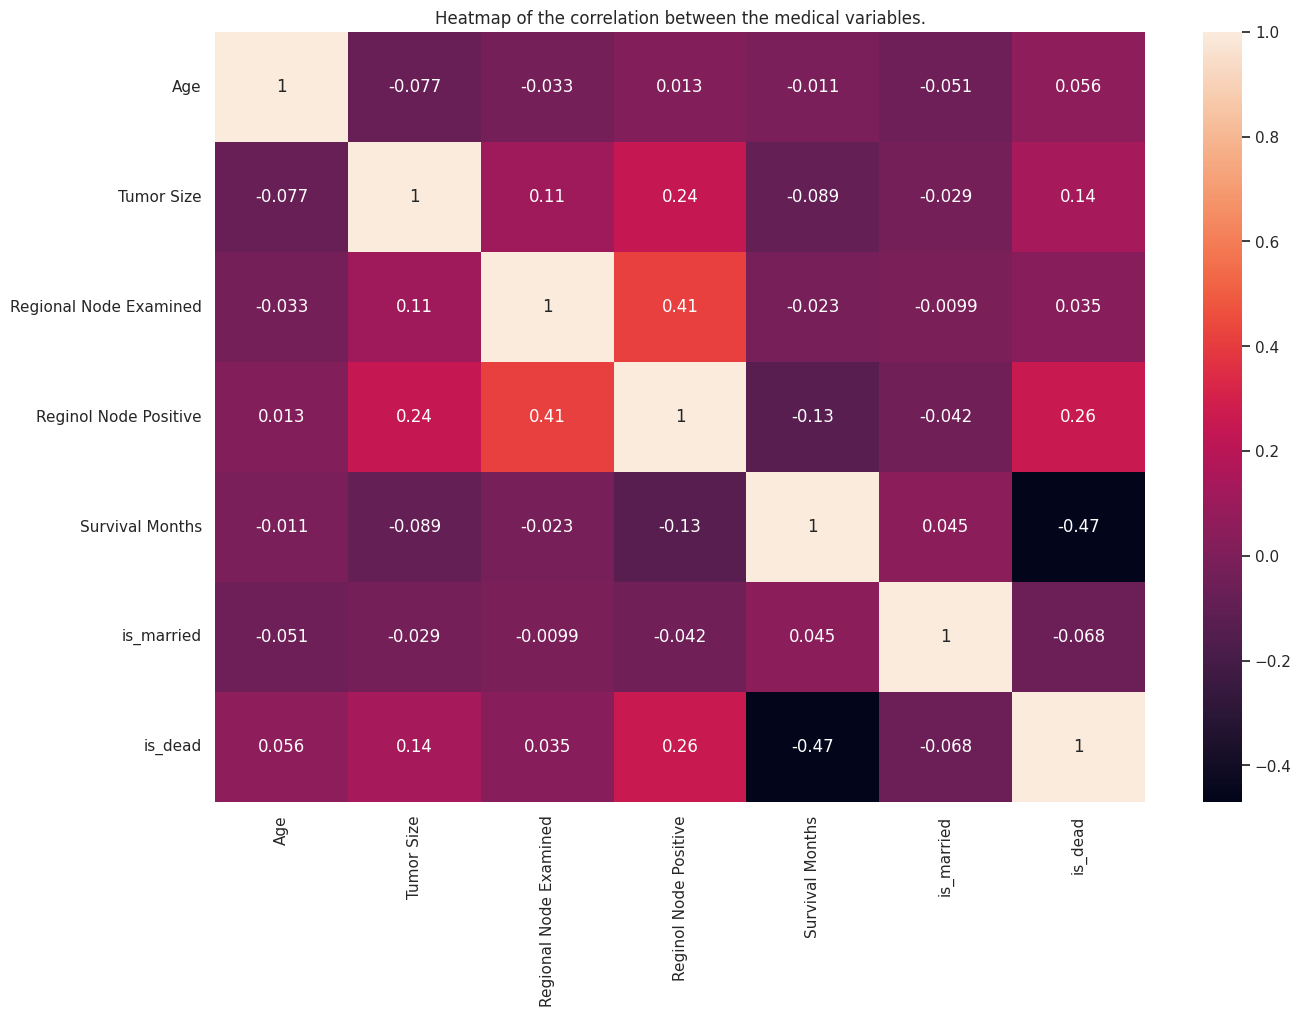

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
raw_data["is_married"] = raw_data["Marital Status"].apply(lambda x: 1 if x == "Married" else 0)
raw_data["is_dead"] = raw_data["Status"].apply(lambda x: 1 if x == "Dead" else 0)
modified_variables = med_variables.copy()
modified_variables.append("is_married")
modified_variables.append("is_dead")
sns.heatmap(raw_data[modified_variables].corr(numeric_only=True), annot=True).set(title="Heatmap of the correlation between the medical variables.")

Solution: Given the heatmap we can see that there are really not many medium or strong correlations between variables except for regional node examined and positives. Since the variables under married people all have a negative correlation and even in death, we can see that being married has nothing to do with how it affects a patients ability to survive/how long they have left to live.

###  Q4:
Solution: We can see that before removing the outliers, we can find many of them in most of the medical variables except age. Keeping that in mind, we developed a function that will replace our outliers from the dataframe with the median as it is not sensitive towards them and then the modified dataframe is returned by the function. The data was then cleaned four times because after the 1st, 2nd, and 3rd attempt, there were still some outliers left unchanged and by the third time it was cleaned there were no longer outliers present in the dataframe.

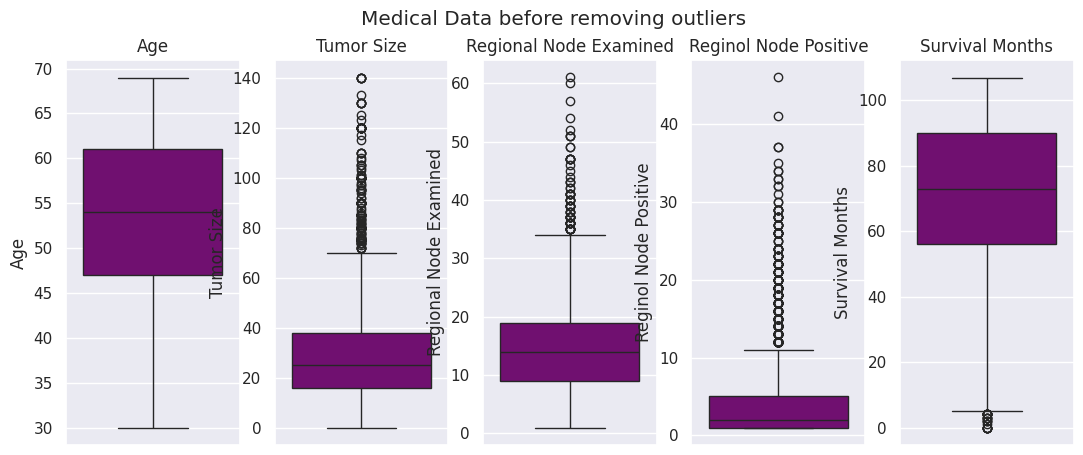

In [9]:
med_variables = ["Age", "Tumor Size", "Regional Node Examined" ,"Reginol Node Positive", "Survival Months"]
sns.set_style("darkgrid")
plt.figure(figsize=(13, 5))
plt.suptitle('Medical Data before removing outliers')

for i in range(1, len(med_variables)+1):
    plt.subplot(1,5, i)
    sns.boxplot(raw_data[med_variables[i-1]], color="Purple")
    plt.title(med_variables[i-1])
    

In [10]:
def remove_outliers(data, columns):
    for i in columns:
        firstQ = data[i].quantile(0.25)
        thirdQ = data[i].quantile(0.75)
        IQR = thirdQ - firstQ

        upperBound = thirdQ + 1.5 * IQR
        lowerBound = firstQ - 1.5 * IQR

        median = data[i].median()

        data.loc[(data[i] > upperBound), i] = median
        data.loc[(data[i] < lowerBound), i] = median

    return data

cleaned_data = remove_outliers(raw_data, med_variables)
cleaned_data = remove_outliers(cleaned_data, med_variables)
cleaned_data = remove_outliers(cleaned_data, med_variables)
cleaned_data = remove_outliers(cleaned_data, med_variables)

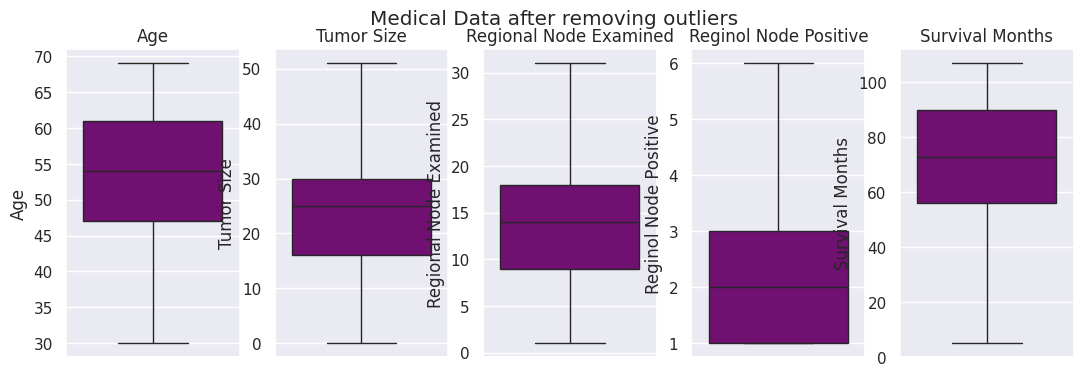

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(13, 4))
plt.suptitle('Medical Data after removing outliers')

for i in range(1, len(med_variables)+1):
    plt.subplot(1,5, i)
    sns.boxplot(cleaned_data[med_variables[i-1]], color="Purple").set(title="")
    plt.title(med_variables[i-1])
    plt.xticks([])

###  Q5:
Solution: If there are missing values found in the medical values, since the outliers are removed and they are numerical data, instead of just dropping and deleting the rows we can replace the values to be the mean of the medical variables.

In [12]:
for i in med_variables:
    cleaned_data[i] = cleaned_data[i].fillna(cleaned_data[i].mean())

###  Q6:
Solution: Medically speaking the following variables chosen are not able to have a value of 0, and others were chosen because they have a zero value that shouldnt be there. If we find that the data is categorical we replace it with the mode, and if its numerical since outliers are removed, we can use mean as the replacement values for the 0 values.

In [13]:
non_zero = ["Age", "Grade", "Tumor Size", "Progesterone Status", "Survival Months", "Estrogen Status"]

cleaned_data["Grade"] = pd.to_numeric(cleaned_data[non_zero[1]], errors='coerce').fillna(0)
cleaned_data["Grade"].astype("int")

for i in non_zero:
    if cleaned_data[i].dtype == "object":
        cleaned_data[i].replace(to_replace="0", value=cleaned_data[i].mode()[0], inplace=True)
    else:
        cleaned_data[i].replace(to_replace=0, value=cleaned_data[i].mean(), inplace=True)

###  Q7:
Solution: First we process the remaining data that was deemed useful and drop the rest. Secondly we will then use min and max scaler to help normalize our data and not allow our models to be more affected by larger inputs.

In [14]:
cleaned_data.drop(["Race", "Marital Status", "is_married", "is_dead", "6th Stage"], axis=1, inplace=True)

cleaned_data = pd.get_dummies(data=cleaned_data, columns=["A Stage"], prefix=["Spread"], dtype="int")

cleaned_data["T Stage "] = cleaned_data["T Stage "].str.replace("T", "")
cleaned_data["T Stage "].fillna(-1, inplace=True)
cleaned_data["T Stage "] = cleaned_data["T Stage "].astype("int")
cleaned_data["T Stage "] = cleaned_data["T Stage "].replace(-1, cleaned_data["T Stage "].median())

cleaned_data["N Stage"] = cleaned_data["N Stage"].str.replace("N", "")
cleaned_data["N Stage"].fillna(-1, inplace=True)
cleaned_data["N Stage"] = cleaned_data["N Stage"].astype("int")

cleaned_data["Status"].fillna(-1, inplace=True)
cleaned_data["Status"] = cleaned_data["Status"].str.replace("Alive", "1")
cleaned_data["Status"] = cleaned_data["Status"].str.replace("Dead", "0")
cleaned_data["Status"] = cleaned_data["Status"].astype("int")
cleaned_data["Status"] = cleaned_data["Status"].replace(-1, cleaned_data["Status"].median())

cleaned_data["Estrogen Status"] = cleaned_data["Estrogen Status"].str.replace("Positive", "1")
cleaned_data["Estrogen Status"] = cleaned_data["Estrogen Status"].str.replace("Negative", "0")
cleaned_data["Estrogen Status"] = cleaned_data["Estrogen Status"].fillna(-1)
cleaned_data["Estrogen Status"] = cleaned_data["Estrogen Status"].astype("int")
cleaned_data["Estrogen Status"] = cleaned_data["Estrogen Status"].replace(-1, cleaned_data["Estrogen Status"].median())

cleaned_data["Progesterone Status"] = cleaned_data["Progesterone Status"].str.replace("Positive", "1")
cleaned_data["Progesterone Status"] = cleaned_data["Progesterone Status"].str.replace("Negative", "0")
cleaned_data["Progesterone Status"] = cleaned_data["Progesterone Status"].fillna(-1)
cleaned_data["Progesterone Status"] = cleaned_data["Progesterone Status"].astype("int")
cleaned_data["Progesterone Status"] = cleaned_data["Progesterone Status"].replace(-1, cleaned_data["Progesterone Status"].median())

cleaned_data["differentiate"] = cleaned_data["differentiate"].fillna(cleaned_data["differentiate"].mode()[0])
cleaned_data["differentiate"] = cleaned_data["differentiate"].str.replace("Undifferentiated", "0")
cleaned_data["differentiate"] = cleaned_data["differentiate"].str.replace("Poorly differentiated", "1")
cleaned_data["differentiate"] = cleaned_data["differentiate"].str.replace("Moderately differentiated", "2")
cleaned_data["differentiate"] = cleaned_data["differentiate"].str.replace("Well differentiated", "3")
cleaned_data["differentiate"] = cleaned_data["differentiate"].astype("int")

for i in cleaned_data.keys():
        cleaned_data[i] = cleaned_data[i].astype('int')

In [15]:
from sklearn.preprocessing import MaxAbsScaler

mmScaler = MaxAbsScaler()
# cleaned_data = pd.DataFrame(mmScaler.fit_transform(cleaned_data), columns=cleaned_data.columns)
cleaned_data["Tumor Size"] = mmScaler.fit_transform(cleaned_data[["Tumor Size"]])

###  Q8 :
Solution: We decided to add the following columns, Cancer Stage, Positive Node Ratio, Tumor Differntiation, and Hormone Indicator, as this allows us to show the different interaction of the individual attributes where we are able to get more relevant information from the data.


In [16]:
cleaned_data["Cancer Stage"] = cleaned_data["T Stage "] + cleaned_data["N Stage"]
cleaned_data["Cancer Stage"] = cleaned_data["Cancer Stage"].replace(1, 1)
cleaned_data["Cancer Stage"] = cleaned_data["Cancer Stage"].replace(2, 2)
cleaned_data["Cancer Stage"] = cleaned_data["Cancer Stage"].replace(3, 2)
cleaned_data["Cancer Stage"] = cleaned_data["Cancer Stage"].replace(4, 3)
cleaned_data["Cancer Stage"] = cleaned_data["Cancer Stage"].replace(5, 3)
cleaned_data["Cancer Stage"] = cleaned_data["Cancer Stage"].replace(6, 4)
cleaned_data["Cancer Stage"] = cleaned_data["Cancer Stage"].replace(7, 4)

cleaned_data["Tumor Differntiation"] = cleaned_data["Grade"] * cleaned_data["differentiate"]
cleaned_data["Positive Node Ratio"] = round(cleaned_data["Reginol Node Positive"] / cleaned_data["Regional Node Examined"], 2)
cleaned_data["Positive Node Ratio"] = cleaned_data["Positive Node Ratio"].fillna(cleaned_data["Positive Node Ratio"].mean())
cleaned_data["Hormone Indicator"] = cleaned_data["Estrogen Status"] * cleaned_data["Progesterone Status"]

cleaned_data

,Age,T Stage,N Stage,differentiate,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Spread_Distant,Spread_Regional,Cancer Stage,Tumor Differntiation,Positive Node Ratio,Hormone Indicator
0,68,1,1,1,3,0.078431,1,1,24,1,60,1,0,1,2,3,0.04,1
1,50,2,2,2,2,0.686275,1,1,14,5,62,1,0,1,3,4,0.36,1
2,58,3,3,2,2,0.490196,1,1,14,2,75,1,0,1,4,4,0.14,1
3,58,1,1,1,3,0.352941,1,1,2,1,71,1,0,1,2,3,0.50,1
4,47,2,1,2,3,0.803922,1,1,3,1,71,1,0,1,2,6,0.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,2,2,0.176471,1,1,1,1,49,1,0,1,2,4,1.00,1
4020,56,2,2,2,2,0.901961,1,1,14,2,69,1,0,1,3,4,0.14,1
4021,68,2,1,2,2,0.431373,1,0,11,3,69,1,0,1,2,4,0.27,0
4022,58,2,1,2,2,0.862745,1,1,11,1,72,1,0,1,2,4,0.09,1


# Assignment 2 - Machine Learning Models for Prediction
**(15 points total)**

 
* In **Assignment 1**, we have explored the data, cleaned up the data, modified features, and created new ones. 
* In **Assignment 2**, we will apply supervised machine learning models for classification and regression, evaluate its perofrmance, and identify the best models to solve the following problems: 

    * The **classification problem** is: given a train dataset of patients who survived or did not survive, build a model which can determine based on a given test dataset not containing the death event information information, if these patients in the test dataset survived or not. 

    * The **regression problem** is: predict the number of months that remains for the survival of the patient.



**Question 1. (Data preparation)**  _(2 points)_
* List the relevant features which you will use for classification and explain your answer (*a relevant feature is a feature that can have an impact on the chance of survival of the patient*).
* List the relevant features which you will use for regression and explain your answer (*a relevant feature is a feature that can have an impact on the prediction of the number of remaining survival months of the patient*).
* Divide both your datasets into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    
Classification Features: The features were chosen based on how they indicated that they all have an effect on whether a patient is already dead or not. For example age could be seen as where the higher the age of the patient the weaker the immune system they have which increases the risk in them dying, or what stage of cancer they have could impact their survivability, etc.

Regression Features: Filtering out additional data that has no bearing on affecting survival months, we chose the most critical ones that are seen as inidcators where they would hopefully have a direct relationship where if the stats get worse then the less chance they have at more time. Like how a lower tumor size could indicate that they have a greater and longer time left to survive versus those who have greater sizes.




###  Data Preparation & Spliting for the Classification Model

In [17]:
classification_features = ["Age", "Cancer Stage", "Positive Node Ratio", "Survival Months", "Tumor Size", "Spread_Distant", "Spread_Regional", "Hormone Indicator", "Tumor Differntiation"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
X = cleaned_data[classification_features]
y = cleaned_data["Status"]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X,y, test_size=0.3)

###  Data Preparation & Spliting for the Regression Model

In [19]:
regression_features = ["Age", "Cancer Stage", "Status", "Tumor Size", "Spread_Distant", "Positive Node Ratio", "Tumor Differntiation"]

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = cleaned_data[regression_features]
y = cleaned_data["Survival Months"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y, test_size=0.3)

**Question 2. (Classification models)**  _(3 points)_
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0

Solutions: SVC, Logistic Regressions, and Random Forest Classfiers were picked as the models to be used because they fit the features being tested. SVC is used where they will analyza the data in the features and check whether the simmilarities of data are related to whether they are dead or not and use that to predict others sets of data. Logistic Regression is then used as well because it will try to see what types of data that are considered true or high probability and then use it to predict its relationship with the status of the patient. Lastly Random Forest is used to create multiple decision trees that lead to an output and then combining said trees to predict the outcome of the patient.
 


In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

cmodel1 = SVC(kernel="linear")
cmodel2 = LogisticRegression()
cmodel3 = RandomForestClassifier()

cmodel1.fit(X_train_cls, y_train_cls)
cmodel2.fit(X_train_cls, y_train_cls)
cmodel3.fit(X_train_cls, y_train_cls)

RandomForestClassifier()

In [22]:
predictions1 = cmodel1.predict(X_test_cls)
predictions2 = cmodel2.predict(X_test_cls)
predictions3 = cmodel3.predict(X_test_cls)

**Question 3. (Evaluation of classification models)**  _(3 points)_
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?

The best model is Random Forest Classifier as it has the best accuracy, AUC score, recall score, and precision score out of the three machine learning classification models used.


In [23]:
print(f"""Linear SVC Performance:
 - Accuracy: {round(accuracy_score(y_test_cls, predictions1, normalize=True), 2) * 100}% Accurate
 - AUC Score: {roc_auc_score(y_test_cls, predictions1)}
{classification_report(y_test_cls, predictions1)}
""")

Linear SVC Performance:
 - Accuracy: 90.0% Accurate
 - AUC Score: 0.6852678949060211
              precision    recall  f1-score   support

           0       0.80      0.39      0.52       171
           1       0.91      0.98      0.94      1037

    accuracy                           0.90      1208
   macro avg       0.86      0.69      0.73      1208
weighted avg       0.89      0.90      0.88      1208




In [24]:
print(f"""Logistic Regressions Performance:
 - Accuracy: {round(accuracy_score(y_test_cls, predictions2, normalize=True), 2) * 100}% Accurate
 - AUC Score: {roc_auc_score(y_test_cls, predictions2)}
{classification_report(y_test_cls, predictions2)}
""")

Logistic Regressions Performance:
 - Accuracy: 89.0% Accurate
 - AUC Score: 0.6985033300061468
              precision    recall  f1-score   support

           0       0.70      0.43      0.53       171
           1       0.91      0.97      0.94      1037

    accuracy                           0.89      1208
   macro avg       0.81      0.70      0.74      1208
weighted avg       0.88      0.89      0.88      1208




In [25]:
print(f"""Random Forest Classifier Performance:
 - Accuracy: {round(accuracy_score(y_test_cls, predictions3, normalize=True), 2) * 100}% Accurate
 - AUC Score: {roc_auc_score(y_test_cls, predictions3)}
{classification_report(y_test_cls, predictions3)}
""")

Random Forest Classifier Performance:
 - Accuracy: 90.0% Accurate
 - AUC Score: 0.7614153513001405
              precision    recall  f1-score   support

           0       0.71      0.56      0.63       171
           1       0.93      0.96      0.95      1037

    accuracy                           0.90      1208
   macro avg       0.82      0.76      0.79      1208
weighted avg       0.90      0.90      0.90      1208




**Question 4. (Regression models)**  _(3 points)_
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 

Solution: Since we are trying to identify relationship between our features and the amount of time they have left, we used linear regression to predict it based on the fact that there may be a linear relationship between the features and months left. We then also used Gradient Boosting Regression so if there was not a strong linear relationship of all of them together we can then combine them to be one stronger relationship.



In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

rmodel1 = GradientBoostingRegressor()
rmodel2 = LinearRegression()

rmodel1.fit(X_train_reg, y_train_reg)
rmodel2.fit(X_train_reg, y_train_reg)

rPredictions1 = rmodel1.predict(X_test_reg)
rPredictions2 = rmodel2.predict(X_test_reg)

**Question 5. (Evaluation of regression models)**  _(3 points)_
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?

* Solution: Based on the results, we can see that while having simmilar data, the performance is not as great as it should be, though our error rates are low, the accuracy of the models are only within 20-25% accuracy. But in our case, the LinearRegression shows the best results.



In [27]:
print(f"""Gradient Boosting Regressor Performance:
 - Mean Absolute Error: {round(mean_absolute_error(y_test_reg, rPredictions1), 2)}
 - Mean Squared Error: {round(mean_squared_error(y_test_reg, rPredictions1),2)}
 - R2 Score: {round(r2_score(y_test_reg, rPredictions1),2)}
""")

Gradient Boosting Regressor Performance:
 - Mean Absolute Error: 16.39
 - Mean Squared Error: 394.69
 - R2 Score: 0.22



In [28]:
print(f"""Linear Regression Performance:
 - Mean Absolute Error: {round(mean_absolute_error(y_test_reg, rPredictions2), 2)}
 - Mean Squared Error: {round(mean_squared_error(y_test_reg, rPredictions2),2)}
 - R2 Score: {round(r2_score(y_test_reg, rPredictions2),2)}
""")

Linear Regression Performance:
 - Mean Absolute Error: 16.24
 - Mean Squared Error: 390.47
 - R2 Score: 0.23



**Question 6. (Possible improvements)** _(1 points)_
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?

To improve classification, we need to fine tune our features to where the ones we are using have a more direct relationship towards the status of the patient. We can also fine tune our data processing more to make it more normalize and scaled more efficiently.

To improve regression, we need to examine more factors like weight, family history, alcohol usage, smoking usage, and other health related factors that could have either a direct or indirect relationship to the amount of months they have left at survival.

And lastly, is to increase the amount of data being examined as with limited data it is bottlenecked and might need more to learn other perspectives and relationships between the data.,